In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
np.random.seed(5721)

cmap = cm.get_cmap('rainbow')

g = lambda x: -np.cos(x * 0.5 * np.pi) + 1.0
xs = np.random.uniform(-1, 1, 10)
ts = g(xs) + np.random.normal(0, 0.2, xs.shape)

f = lambda x, w: w[0] * (x ** 2.0)[:, None] + w[1] * x[:, None]

def plot_gradient_descent(WS, WSmax=10):
    n = WS.shape[0]
    N = xs.shape[0]

    xs_test = np.linspace(-1, 1, 100)
    ts_test = g(xs_test)

    ws0, ws1 = np.linspace(-4, 4), np.linspace(-4, 4)
    wss0, wss1 = np.meshgrid(ws0, ws1)
    ws = np.array((wss0.flatten(), wss1.flatten()))

    def E(ws):
        return np.sum(np.square(f(xs, np.array(ws)) - ts[:, None]) / N, axis=0)
    Es = E(ws).reshape(wss0.shape)

    fig, axs = plt.subplots(1, 2, figsize=(6.25, 3))

    axs[0].plot(WS[:, 0], WS[:, 1], 'k', '-', zorder=0)
    axs[0].plot(WS[:, 0], WS[:, 1], color='white', linestyle=(0, (1, 1)), zorder=0)
    dEdw0, dEdw1 = None, None
    for i in range(n):
        ϵ = 1e-6
        dEdw0 = (E((WS[i, 0] + 0.5 * ϵ, WS[i, 1])) - E((WS[i, 0] - 0.5 * ϵ, WS[i, 1]))) / ϵ
        dEdw1 = (E((WS[i, 0], WS[i, 1] + 0.5 * ϵ)) - E((WS[i, 0], WS[i, 1] - 0.5 * ϵ))) / ϵ
        axs[0].scatter(WS[i, 0], WS[i, 1], marker='o', sizes=(100,), color=cmap(i / WSmax), edgecolors=('None',), linewidth=0.0)
#        axs[0].scatter(WS[i, 0], WS[i, 1], marker='o', sizes=(100,), color=cmap(i / WSmax), edgecolors=('white',), linewidth=2.0)
#        axs[0].scatter(WS[i, 0], WS[i, 1], marker='o', sizes=(100,), color=cmap(i / WSmax), edgecolors=('black',), linewidth=2.0, linestyle=(0, (2, 1)), facecolors=('None',))
        axs[0].quiver(WS[i, 0], WS[i, 1], 0.5 * dEdw0, 0.5 * dEdw1, zorder=10, color='white', width=0.02, scale=1.0, scale_units='xy')
    axs[0].contourf(ws0, ws1, np.sqrt(Es), cmap=cm.get_cmap('viridis'), zorder=-1)
    axs[0].contour(ws0, ws1, np.sqrt(Es), colors=['k'], linestyles=['--'], zorder=-1)
    axs[0].set_xlabel('$w_0$')
    axs[0].set_ylabel('$w_1$')
    axs[0].set_xlim(-4, 4)
    axs[0].set_ylim(-4, 4)
    axs[0].set_title('Loss function $E(\\vec w)$')

    axs[1].plot(xs_test, ts_test, 'k', linestyle=(0, (1, 4)), label='Ground Truth', linewidth=1)
    axs[1].plot(xs, ts, 'k+', label='Samples $(x_k, t_k)$', zorder=100)
    for i in range(n):
        axs[1].plot(xs_test, f(xs_test, WS[i]), color=cmap(i / WSmax),
                    label=None if i + 1 < n else '$f(x) = {:1.2f} x^2 + {:1.2f} x$'.format(WS[i, 0], WS[i, 1]).replace('+ -', '-'))
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$t$')
    axs[1].legend(loc='upper center')
    axs[1].set_xlim(-1, 1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_title('Samples and function $f(x; \\vec w) = w_0 x^2 + w_1 x$')    

    fig.tight_layout()

    return fig, axs, np.array((dEdw0, dEdw1)).reshape(1, 2)

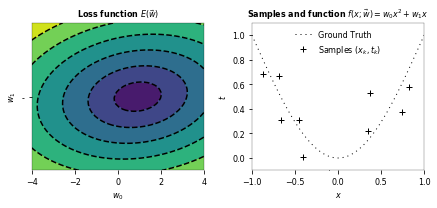

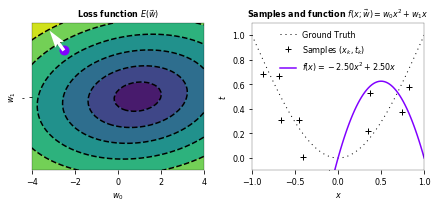

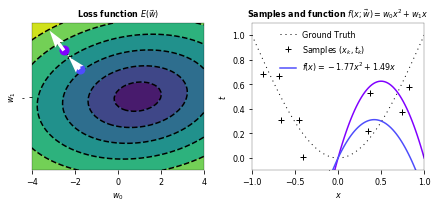

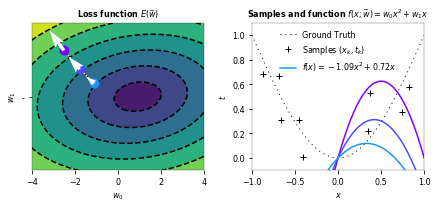

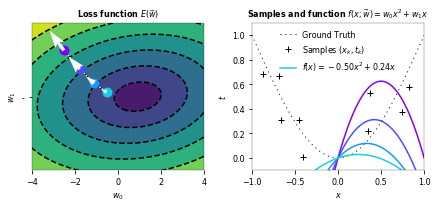

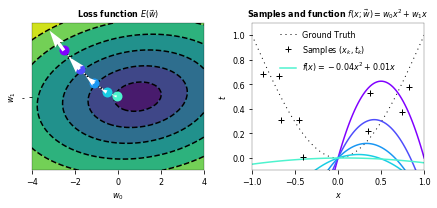

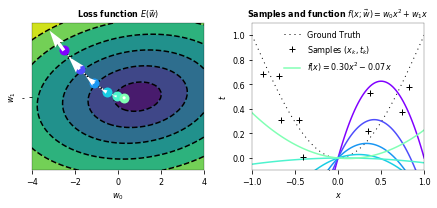

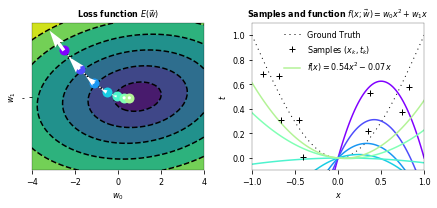

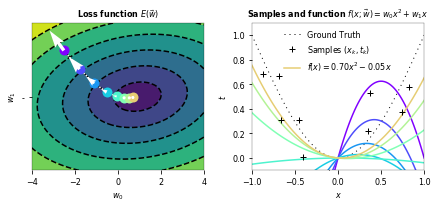

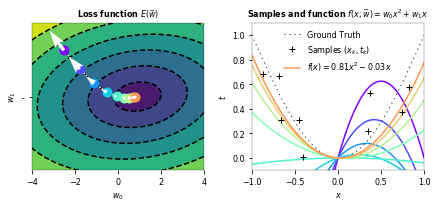

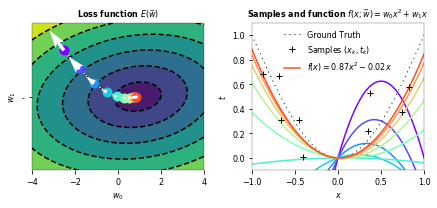

In [9]:
np.random.seed(58219)

WSmax = 10
WS = np.array([]).reshape(0, 2)
fig, _, dEdw = plot_gradient_descent(WS, WSmax=WSmax)
fig.savefig('../gradient_descent_poly_example_00.pdf', bbox_inches='tight', transparent=True)

WS = np.array([[-2.5, 2.5]])
for i in range(WSmax):
    η = 0.5 + i / (WSmax - 1) # Cheat a little bit by increasing eta over time (makes for a nicer picture)
    fig, _, dEdw = plot_gradient_descent(WS, WSmax=WSmax)
    WS = np.concatenate((WS, WS[-1] - η * dEdw), axis=0)
    fig.savefig('../gradient_descent_poly_example_{:02}.pdf'.format(i + 1), bbox_inches='tight', transparent=True)

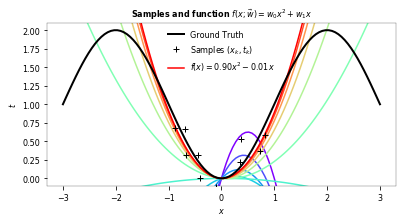

In [10]:
xs_test = np.linspace(-3, 3, 100)
ts_test = g(xs_test)

n = WS.shape[0]

fig, ax = plt.subplots(figsize=(6.25, 3))
ax.plot(xs_test, ts_test, 'k', label='Ground Truth', linewidth=2, zorder=100)
ax.plot(xs, ts, 'k+', label='Samples $(x_k, t_k)$', zorder=100)
for i in range(n):
    ax.plot(xs_test, f(xs_test, WS[i]), color=cmap(i / WSmax),
            label=None if i + 1 < n else '$f(x) = {:1.2f} x^2 + {:1.2f} x$'.format(WS[i, 0], WS[i, 1]).replace('+ -', '-'))
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.legend(loc='upper center')
ax.set_ylim(-0.1, 2.1)
ax.set_title('Samples and function $f(x; \\vec w) = w_0 x^2 + w_1 x$')    
fig.savefig('../gradient_descent_poly_example_gt.pdf', bbox_inches='tight', transparent=True)